# Обработка файлов с данными из CST


In [29]:
import numpy as np
import matplotlib.pyplot as plt

#try:
#    f = open("C:/Users/Kondr/source/python/CST/Export/Farfield_2.txt", mode = 'r', encoding = 'utf-8')
#    for line in f:
#        print(line, end='')
#finally:
#    f.close()


with open(r"C:/Users/Kondr/source/python/CST/Export/Farfield_2.txt","r", encoding = 'utf-8') as f:
    data = f.readlines()
    N = len(data)
    theta = np.array([float(data[2][0:8])])
    phi = np.array([float(data[2][17:24])])
    F = np.array([float(data[2][35:45])])
    
    
    for i in range(1,N-2):
        phi = np.append(phi, float(data[i+2][17:24]))
        theta = np.append(theta, float(data[i+2][0:8]))
        F = np.append(F, float(data[i+2][35:45]))

N = len(theta)
phi0 = -50.0

FF1 = np.zeros(72)
theta1 = np.zeros(72)
j = 0
for i in range (0,N):
    if phi[i]==phi0:
        FF1[j] = F[i]
        theta1[j] = theta[j]
        j=j+1

## Построение диаграмм

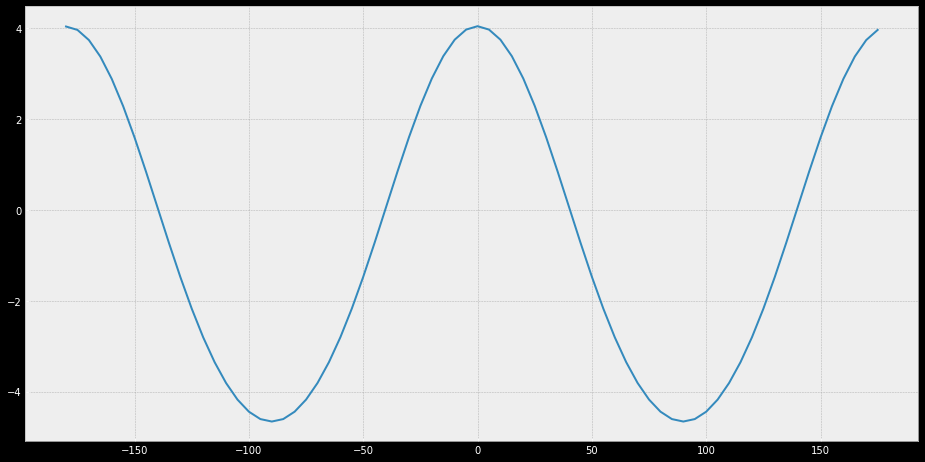

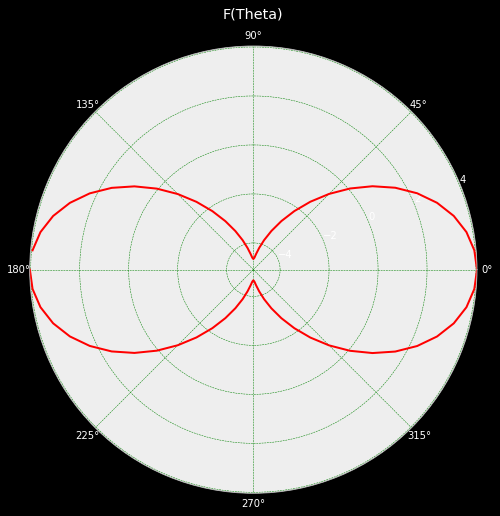

In [30]:
plt.style.use('bmh')   
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(theta1, FF1)

fig2 = plt.figure(figsize=(20,20))
ax2 = fig2.add_subplot(231, projection='polar')
ax2.plot(theta1*np.pi/180, FF1, color='r', linewidth=2)
ax2.set_ylim(ymax=max(FF1))
# ax2.set_ylim(ymin=-50, ymax=max(FF1))
    # Так как 0 и 2*pi - это одна и та же точка, то значение в ней должно быть одно
    # Однако, будет разрыв между последней точкой и нулевой.
    # Чтобы его убрать, искусственно соединим эти точки.
    # Замыкаем (соединяем конец с началом)
#ax2.plot((theta[-1],theta[0]),(DN[-1],DN[0]), color='r', linewidth=1.)
ax2.grid(True, color='green', linestyle='--')
ax2.set_title("F(Theta)", loc='center')
plt.tight_layout()
